In [70]:
import sys
import os
import PIL
from PIL import Image
import psutil
import time

sys.path.append(os.path.abspath("../"))
from src.helper import rgb_to_cmyk, calculate_cmyk_percentage, predict_pdf, label_to_price

In [2]:
initial_cpu = psutil.cpu_percent(interval=None)
initial_memory = psutil.virtual_memory().used

img = Image.open("../outputs/pdfium_10dpi/page-001.jpg").convert("RGB")
final_cpu = psutil.cpu_percent(interval=None)
final_memory = psutil.virtual_memory().used

# Menghitung perubahan
cpu_usage = final_cpu - initial_cpu
memory_usage = final_memory - initial_memory

# print(f"Waktu eksekusi: {end_time - start_time:.4f} detik")
print(f"Penggunaan CPU: {cpu_usage:.2f}%")
print(f"Penggunaan memori: {memory_usage / (1024 ** 2):.2f} MB") 

Penggunaan CPU: 30.50%
Penggunaan memori: 0.77 MB


In [1]:
import pandas as pd

In [47]:
df = pd.read_csv("../datasets/cmyk_by_dpi_and_render_options.csv")
df

,converting_time,page,dpi,c,m,y,k,sum,base_minus_curr_sum,diff
0,0.392798,1,300,0.18,0.18,0.39,7.94,8.69,0.00,0.00
1,1.442968,2,300,1.31,1.06,0.01,3.64,6.02,0.00,0.00
2,0.197159,3,300,0.00,0.00,0.00,10.21,10.21,0.00,0.00
3,0.152346,4,300,0.00,0.00,0.00,11.03,11.03,0.00,0.00
4,0.151719,5,300,0.00,0.00,0.00,11.18,11.18,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
82207,0.020813,880,5,0.00,0.00,0.00,0.00,0.00,5.71,5.71
82208,0.028406,881,5,2.55,11.07,11.06,6.25,30.93,3.52,3.52
82209,0.003493,882,5,0.81,1.20,1.84,1.35,5.20,-0.09,0.09
82210,0.014516,883,5,4.67,27.89,29.58,12.44,74.58,-3.45,3.45


In [48]:
df.iloc[0:, :]

,converting_time,page,dpi,c,m,y,k,sum,base_minus_curr_sum,diff
3,0.152346,4,300,0.0,0.0,0.0,11.03,11.03,0.0,0.0


In [52]:
option_batch_count = df['dpi'].nunique() * df['page'].nunique()

In [57]:
df['options'] = None
option_batch_count = df['dpi'].nunique() * df['page'].nunique()
df.iloc[option_batch_count*0:option_batch_count*1, df.columns.get_loc('options')] = 'default'
df.iloc[option_batch_count*1:option_batch_count*2, df.columns.get_loc('options')] = 'txt_aa'
df.iloc[option_batch_count*2:option_batch_count*3, df.columns.get_loc('options')] = 'txt_img_aa'
df

,converting_time,page,dpi,c,m,y,k,sum,base_minus_curr_sum,diff,options
0,0.392798,1,300,0.18,0.18,0.39,7.94,8.69,0.00,0.00,default
1,1.442968,2,300,1.31,1.06,0.01,3.64,6.02,0.00,0.00,default
2,0.197159,3,300,0.00,0.00,0.00,10.21,10.21,0.00,0.00,default
3,0.152346,4,300,0.00,0.00,0.00,11.03,11.03,0.00,0.00,default
4,0.151719,5,300,0.00,0.00,0.00,11.18,11.18,0.00,0.00,default
...,...,...,...,...,...,...,...,...,...,...,...
82207,0.020813,880,5,0.00,0.00,0.00,0.00,0.00,5.71,5.71,txt_img_aa
82208,0.028406,881,5,2.55,11.07,11.06,6.25,30.93,3.52,3.52,txt_img_aa
82209,0.003493,882,5,0.81,1.20,1.84,1.35,5.20,-0.09,0.09,txt_img_aa
82210,0.014516,883,5,4.67,27.89,29.58,12.44,74.58,-3.45,3.45,txt_img_aa


In [63]:
df.to_csv("../datasets/cmyk_by_dpi_and_render_options.csv", index=False)

In [64]:
df = pd.read_csv("../datasets/cmyk_by_dpi_and_render_options.csv")

In [65]:
df

,converting_time,page,dpi,c,m,y,k,sum,base_minus_curr_sum,diff,options
0,0.392798,1,300,0.18,0.18,0.39,7.94,8.69,0.00,0.00,default
1,1.442968,2,300,1.31,1.06,0.01,3.64,6.02,0.00,0.00,default
2,0.197159,3,300,0.00,0.00,0.00,10.21,10.21,0.00,0.00,default
3,0.152346,4,300,0.00,0.00,0.00,11.03,11.03,0.00,0.00,default
4,0.151719,5,300,0.00,0.00,0.00,11.18,11.18,0.00,0.00,default
...,...,...,...,...,...,...,...,...,...,...,...
82207,0.020813,880,5,0.00,0.00,0.00,0.00,0.00,5.71,5.71,txt_img_aa
82208,0.028406,881,5,2.55,11.07,11.06,6.25,30.93,3.52,3.52,txt_img_aa
82209,0.003493,882,5,0.81,1.20,1.84,1.35,5.20,-0.09,0.09,txt_img_aa
82210,0.014516,883,5,4.67,27.89,29.58,12.44,74.58,-3.45,3.45,txt_img_aa


In [76]:
df[(df['dpi'] == 5) & (df['diff']>5)].pivot_table(index='options', values='diff', aggfunc='sum')

,diff
options,
default,1537.51
txt_aa,2200.90
txt_img_aa,2196.25


In [80]:
df[(df['dpi'] == 5) & (df['diff']>=50) & (df['options'] == 'default')]

,converting_time,page,dpi,c,m,y,k,sum,base_minus_curr_sum,diff,options
26522,0.017131,3,5,0.0,0.0,0.0,65.50,65.50,-55.29,55.29,default
26523,0.009017,4,5,0.0,0.0,0.0,75.99,75.99,-64.96,64.96,default
26524,0.009348,5,5,0.0,0.0,0.0,75.99,75.99,-64.81,64.81,default
26525,0.009172,6,5,0.0,0.0,0.0,75.99,75.99,-65.12,65.12,default
26526,0.009151,7,5,0.0,0.0,0.0,75.99,75.99,-64.75,64.75,default
26527,0.009030,8,5,0.0,0.0,0.0,75.99,75.99,-65.06,65.06,default
26528,0.011086,9,5,0.0,0.0,0.0,75.99,75.99,-65.01,65.01,default
26529,0.008791,10,5,0.0,0.0,0.0,75.99,75.99,-65.08,65.08,default
26530,0.009189,11,5,0.0,0.0,0.0,75.99,75.99,-64.69,64.69,default
26531,0.008921,12,5,0.0,0.0,0.0,75.99,75.99,-65.00,65.00,default


In [83]:
import pypdfium2 as pdfium
pdf = pdfium.PdfDocument("../datasets/statistik-indonesia-2024-combined.pdf")

In [151]:
bitmap = pdf[0].render(scale=1/72 * 20, optimize_mode='print')
calculate_cmyk_percentage(bitmap.to_pil())

(0.17, 0.18, 0.43, 8.68)

In [167]:
len(df[(df['dpi']==40) & (df['diff']<5) & (df['options'] == 'default')]) == 884

False

In [168]:
df[(df['dpi']==40) & (df['diff']>=4) & (df['options'] == 'default')]

,converting_time,page,dpi,c,m,y,k,sum,base_minus_curr_sum,diff,options
22986,0.295964,3,40,0.0,0.0,0.0,14.56,14.56,-4.35,4.35,default
22987,0.013837,4,40,0.0,0.0,0.0,16.11,16.11,-5.08,5.08,default
22988,0.014283,5,40,0.0,0.0,0.0,16.27,16.27,-5.09,5.09,default
22989,0.013793,6,40,0.0,0.0,0.0,15.93,15.93,-5.06,5.06,default
22990,0.014056,7,40,0.0,0.0,0.0,16.33,16.33,-5.09,5.09,default
22991,0.013799,8,40,0.0,0.0,0.0,16.02,16.02,-5.09,5.09,default
22992,0.016063,9,40,0.0,0.0,0.0,16.06,16.06,-5.08,5.08,default
22993,0.013681,10,40,0.0,0.0,0.0,15.99,15.99,-5.08,5.08,default
22994,0.014132,11,40,0.0,0.0,0.0,16.40,16.40,-5.10,5.10,default
22995,0.013711,12,40,0.0,0.0,0.0,16.07,16.07,-5.08,5.08,default


In [1]:
import os

In [3]:
ROOT_DIR = os.path.abspath("../")
ROOT_DIR

'/Users/rasyidev/Documents/rasyidevcode/print-cost'

In [4]:
os.getcwd()

'/Users/rasyidev/Documents/rasyidevcode/print-cost/notebook'

In [5]:
os.path.(os.getcwd(), "../")

'/Users/rasyidev/Documents/rasyidevcode/print-cost/notebook/../'

In [17]:
from pathlib import Path

In [18]:
ROOT_DIR = Path().resolve().parent

In [19]:
current_dir

PosixPath('/Users/rasyidev/Documents/rasyidevcode/print-cost')

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(current_dir.joinpath("datasets/cmyk_by_dpi_and_render_options.csv"))
df

,converting_time,page,dpi,c,m,y,k,sum,base_minus_curr_sum,diff,options
0,0.392798,1,300,0.18,0.18,0.39,7.94,8.69,0.00,0.00,default
1,1.442968,2,300,1.31,1.06,0.01,3.64,6.02,0.00,0.00,default
2,0.197159,3,300,0.00,0.00,0.00,10.21,10.21,0.00,0.00,default
3,0.152346,4,300,0.00,0.00,0.00,11.03,11.03,0.00,0.00,default
4,0.151719,5,300,0.00,0.00,0.00,11.18,11.18,0.00,0.00,default
...,...,...,...,...,...,...,...,...,...,...,...
82207,0.020813,880,5,0.00,0.00,0.00,0.00,0.00,5.71,5.71,txt_img_aa
82208,0.028406,881,5,2.55,11.07,11.06,6.25,30.93,3.52,3.52,txt_img_aa
82209,0.003493,882,5,0.81,1.20,1.84,1.35,5.20,-0.09,0.09,txt_img_aa
82210,0.014516,883,5,4.67,27.89,29.58,12.44,74.58,-3.45,3.45,txt_img_aa


In [82]:
df_default = df[df['options'] == 'default'].copy()
df_default

,converting_time,page,dpi,c,m,y,k,sum,base_minus_curr_sum,diff,options
0,0.392798,1,300,0.18,0.18,0.39,7.94,8.69,0.00,0.00,default
1,1.442968,2,300,1.31,1.06,0.01,3.64,6.02,0.00,0.00,default
2,0.197159,3,300,0.00,0.00,0.00,10.21,10.21,0.00,0.00,default
3,0.152346,4,300,0.00,0.00,0.00,11.03,11.03,0.00,0.00,default
4,0.151719,5,300,0.00,0.00,0.00,11.18,11.18,0.00,0.00,default
...,...,...,...,...,...,...,...,...,...,...,...
27399,0.023905,880,5,0.00,0.00,0.00,6.24,6.24,-0.52,0.52,default
27400,0.032836,881,5,2.55,11.07,11.06,15.09,39.77,-5.30,5.30,default
27401,0.003468,882,5,0.81,1.20,1.84,1.35,5.20,-0.09,0.09,default
27402,0.016195,883,5,4.67,27.89,29.58,16.01,78.15,-7.01,7.01,default


In [169]:
for i, j in enumerate("cmyk"):
    print(j)

c
m
y
k


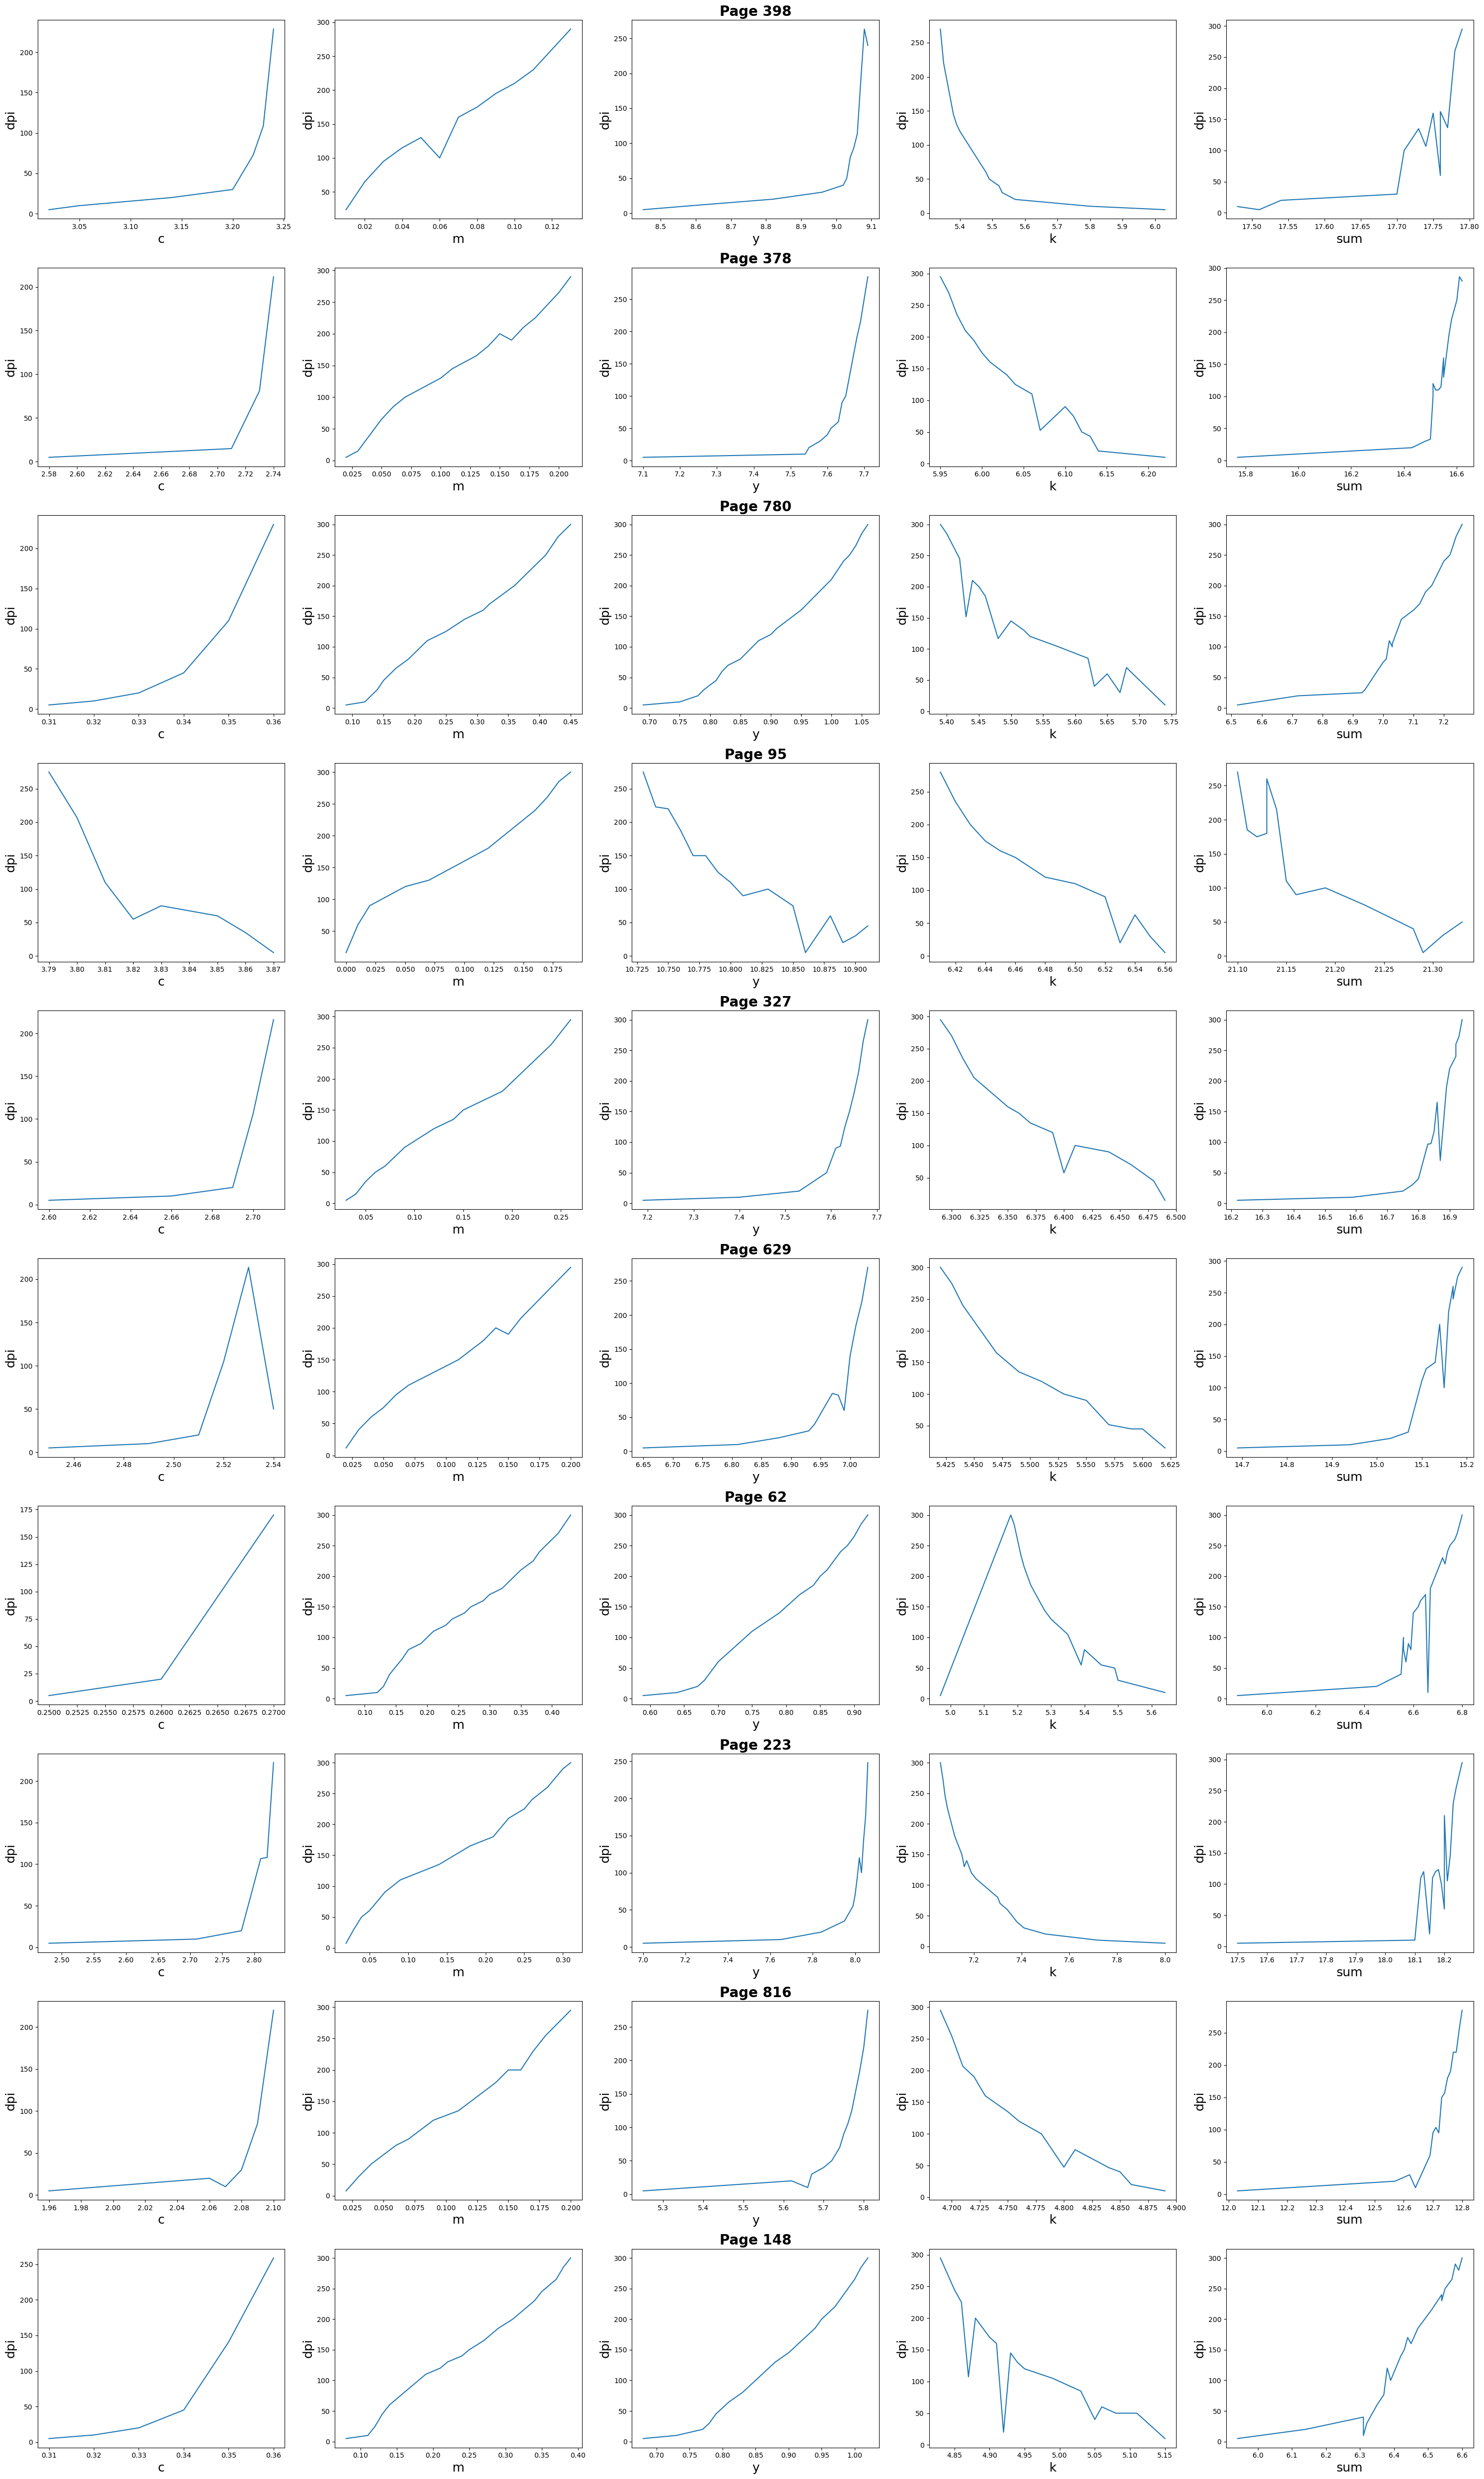

In [180]:
# Tentukan ukuran figure sebelum membuat subplots
fig, ax = plt.subplots(10, 5, figsize=(30, 50))


# Iterasi untuk mengisi setiap subplot
for i, row in enumerate(np.random.randint(1, df_default['page'].nunique(), 10)):
    for j, col in enumerate(['c', 'm', 'y', 'k', 'sum']):
        # Menentukan plot berdasarkan kolom
        sns.lineplot(data=df_default[df_default['page'] == row], x=col, y='dpi', ax=ax[i, j], errorbar=None)

        # Menambahkan judul untuk satu baris (misalnya, berdasarkan nilai `row`)
        ax[i, 2].set_title(f"Page {row}", fontsize=20, fontweight='bold', loc='center')

        # Menambahkan label pada sumbu x dan y
        ax[i, j].set_xlabel(col, fontsize=18)  # Memperbesar font label x
        ax[i, j].set_ylabel('dpi', fontsize=18)  # Memperbesar font label y

# Agar layout lebih rapi
plt.tight_layout()

# Menampilkan plot
plt.show()

In [122]:
df_default[(df_default['dpi']==300) & (df_default['sum']>=df_default['sum'].median())][['c', 'm','y','k']]

,c,m,y,k
26,60.88,1.99,52.01,43.08
34,4.59,2.39,9.90,6.50
74,12.64,1.50,22.09,14.34
81,3.35,0.26,9.52,6.83
82,3.28,0.23,9.36,6.45
...,...,...,...,...
865,2.79,0.21,7.64,6.07
877,60.37,0.33,49.99,46.77
880,0.99,10.34,11.65,11.49
882,2.35,26.70,30.23,11.86


<Axes: ylabel='Density'>

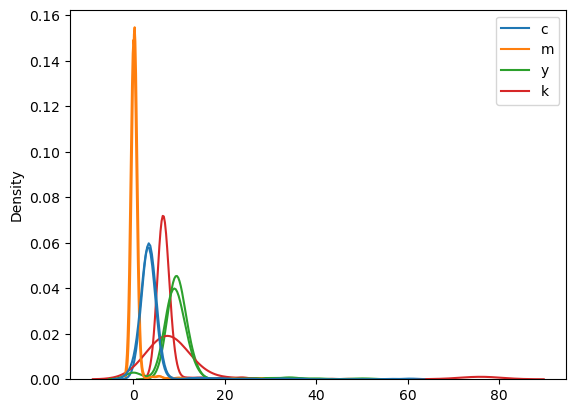

In [96]:
sns.kdeplot(df_default[(df_default['dpi']==300) & (df_default['sum']>=df_default['sum'].median())][['c', 'm','y','k']])
sns.kdeplot(df_default[(df_default['dpi']==5) & (df_default['sum']>=df_default['sum'].median())][['c', 'm','y','k']])

In [24]:
df_default[df_default['dpi'] == 50].describe()

,converting_time,page,dpi,c,m,y,k,sum,base_minus_curr_sum,diff
count,884.000000,884.000000,884.0,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,0.049277,442.500000,50.0,2.796290,0.208507,7.248020,6.234706,16.487523,-0.055611,0.200385
std,0.179963,255.333116,0.0,3.965736,1.488747,5.662478,3.485683,12.689008,0.525763,0.489207
min,0.003323,1.000000,50.0,0.000000,0.000000,0.000000,0.060000,0.060000,-3.060000,0.000000
25%,0.028637,221.750000,50.0,1.690000,0.020000,4.712500,4.950000,11.692500,-0.090000,0.040000
50%,0.033334,442.500000,50.0,2.715000,0.040000,7.605000,5.960000,16.315000,0.025000,0.090000
75%,0.039224,663.250000,50.0,3.350000,0.060000,9.417500,6.860000,19.550000,0.100000,0.180000
max,4.986121,884.000000,50.0,60.500000,26.670000,52.090000,46.890000,157.750000,1.400000,3.060000


In [27]:
df_default[(df_default['dpi'] == 5) & (df_default['diff'] >=10)]

,converting_time,page,dpi,c,m,y,k,sum,base_minus_curr_sum,diff,options
26522,0.017131,3,5,0.00,0.00,0.00,65.50,65.50,-55.29,55.29,default
26523,0.009017,4,5,0.00,0.00,0.00,75.99,75.99,-64.96,64.96,default
26524,0.009348,5,5,0.00,0.00,0.00,75.99,75.99,-64.81,64.81,default
26525,0.009172,6,5,0.00,0.00,0.00,75.99,75.99,-65.12,65.12,default
26526,0.009151,7,5,0.00,0.00,0.00,75.99,75.99,-64.75,64.75,default
26527,0.009030,8,5,0.00,0.00,0.00,75.99,75.99,-65.06,65.06,default
26528,0.011086,9,5,0.00,0.00,0.00,75.99,75.99,-65.01,65.01,default
26529,0.008791,10,5,0.00,0.00,0.00,75.99,75.99,-65.08,65.08,default
26530,0.009189,11,5,0.00,0.00,0.00,75.99,75.99,-64.69,64.69,default
26531,0.008921,12,5,0.00,0.00,0.00,75.99,75.99,-65.00,65.00,default


In [29]:
df[(df['dpi'] == 5) & (df['diff'] >=10) & (df['options'] == 'txt_img_aa' )]

,converting_time,page,dpi,c,m,y,k,sum,base_minus_curr_sum,diff,options
81330,0.017049,3,5,0.00,0.00,0.00,64.79,64.79,-54.63,54.63,txt_img_aa
81331,0.008846,4,5,0.00,0.00,0.00,75.99,75.99,-65.02,65.02,txt_img_aa
81332,0.009185,5,5,0.00,0.00,0.00,75.99,75.99,-64.87,64.87,txt_img_aa
81333,0.009072,6,5,0.00,0.00,0.00,75.99,75.99,-65.19,65.19,txt_img_aa
81334,0.008983,7,5,0.00,0.00,0.00,75.99,75.99,-64.81,64.81,txt_img_aa
81335,0.008867,8,5,0.00,0.00,0.00,75.99,75.99,-65.11,65.11,txt_img_aa
81336,0.011102,9,5,0.00,0.00,0.00,75.99,75.99,-65.07,65.07,txt_img_aa
81337,0.008678,10,5,0.00,0.00,0.00,75.99,75.99,-65.15,65.15,txt_img_aa
81338,0.009008,11,5,0.00,0.00,0.00,75.99,75.99,-64.78,64.78,txt_img_aa
81339,0.008721,12,5,0.00,0.00,0.00,75.99,75.99,-65.06,65.06,txt_img_aa


## IDEA
- Bikin model untuk setiap dpi 300, 50, 5
- Kalo 300, pakai fitur sum
- kalo 50, 5, pakai fitur cmyk dan sum
- bandingin hasil 3 ini dengan 300 dpi

In [41]:
df2 = pd.read_csv("../datasets/test-set/dpi_300_50_5_accuracy.csv")
df2

,filename,page,res300,res50,res5
0,Sample.pdf,1,1000,1000,1000
1,Sample.pdf,2,500,500,500
2,Sample.pdf,3,1500,1500,1500
3,Sample.pdf,4,500,500,500
4,Sample.pdf,5,2000,2000,2000
...,...,...,...,...,...
730,Mackay H. Python Programming. Handbook For IoT...,135,500,500,500
731,Mackay H. Python Programming. Handbook For IoT...,136,500,500,500
732,Mackay H. Python Programming. Handbook For IoT...,137,500,500,500
733,Mackay H. Python Programming. Handbook For IoT...,138,500,500,500


In [45]:
index_of_equals = list(df2[(df2['res300'] == df2['res50']) & (df2['res50'] == df2['res5'])].index)

In [48]:
df2.drop(index=index_of_equals)

,filename,page,res300,res50,res5
22,How Charts Lie Getting Smarter about Visual In...,17,500,1000,1000
54,How Charts Lie Getting Smarter about Visual In...,49,500,500,1000
76,How Charts Lie Getting Smarter about Visual In...,71,500,1000,1000
83,How Charts Lie Getting Smarter about Visual In...,78,1000,1000,1500
98,How Charts Lie Getting Smarter about Visual In...,93,500,500,1000
111,How Charts Lie Getting Smarter about Visual In...,106,500,500,1000
112,How Charts Lie Getting Smarter about Visual In...,107,500,500,1000
145,How Charts Lie Getting Smarter about Visual In...,140,1000,1500,1500
169,How Charts Lie Getting Smarter about Visual In...,164,500,500,1000
170,How Charts Lie Getting Smarter about Visual In...,165,1000,1000,1500


In [49]:
import pypdfium2 as pdfium

In [53]:
pdf = pdfium.PdfDocument("../datasets/statistik-indonesia-2024.pdf")
len(pdf)

852

In [55]:
height, width = pdf[0].get_size()
height/width

0.704000947057374

In [72]:
bitmap = pdf[0].render(1/72*5)
pil_img = bitmap.to_pil()
calculate_cmyk_percentage(pil_img)

(55.88, 0.63, 52.46, 44.06)

In [80]:
bitmap = pdf[0].render(1/72*5)
# pil_img = bitmap.to_pil()
np_bitmap = bitmap.to_numpy()
np_bitmap.shape

(50, 35, 3)

In [67]:
35/50

0.7

In [66]:
for i in list(range(300,4,-10)) + [5]:
    bitmap = pdf[0].render(1/72*i)
    pil_img = bitmap.to_pil()
    width, height = pil_img.size
    print(pil_img.size, "||", width/height)

(2079, 2953) || 0.7040298002031832
(2010, 2855) || 0.7040280210157618
(1941, 2756) || 0.7042815674891146
(1871, 2658) || 0.7039127163280662
(1802, 2560) || 0.70390625
(1733, 2461) || 0.7041852905323039
(1663, 2363) || 0.7037663986457893
(1594, 2264) || 0.7040636042402827
(1525, 2166) || 0.7040627885503232
(1456, 2067) || 0.7044025157232704
(1386, 1969) || 0.7039106145251397
(1317, 1871) || 0.703901656867985
(1248, 1772) || 0.7042889390519187
(1178, 1674) || 0.7037037037037037
(1109, 1575) || 0.7041269841269842
(1040, 1477) || 0.7041299932295193
(971, 1378) || 0.704644412191582
(901, 1280) || 0.70390625
(832, 1182) || 0.7038917089678511
(763, 1083) || 0.7045244690674054
(693, 985) || 0.7035532994923858
(624, 886) || 0.7042889390519187
(555, 788) || 0.7043147208121827
(486, 689) || 0.7053701015965167
(416, 591) || 0.7038917089678511
(347, 493) || 0.7038539553752535
(278, 394) || 0.7055837563451777
(208, 296) || 0.7027027027027027
(139, 197) || 0.7055837563451777
(70, 99) || 0.70707070707

TypeError: 'float' object cannot be interpreted as an integer